In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
Nmax=2048
#x = [float(i) for i in range(0,Nmax)]
##y = [0.04375*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
#y = [1.0*10**(-5.0*float(i)/Nmax) for i in range(0,Nmax)]
data = np.loadtxt("Desktop/A2029/radial_profile/radial_prof_xray_0001")
y = data[:,0]
Nmax = len(y)
y = y*3.086e21/1.2344e25
r = np.zeros(Nmax)
x1 = np.zeros(Nmax)
Nden = np.zeros(Nmax)
NTinK = np.zeros(Nmax)
Totg = np.zeros(Nmax)
gden = np.zeros(Nmax)
gprs = np.zeros(Nmax)
Totp = np.zeros(Nmax)
geltn= np.zeros(Nmax)
M=np.zeros(Nmax)
B=np.zeros(Nmax)
K = np.zeros(Nmax)
TkeV = np.zeros(Nmax)
vc = np.zeros(Nmax)
tff = np.zeros(Nmax)
rs = 0.1044; den_unit = 3.7576e-29; len_unit = 1.2344e25; mue=1.17
kpc=3.086e21; msun=2.0e33; G = 6.67428e-8; M200=2.0e15
SMBH = 5.0e10; kB=1.38e-16; mu=0.617; mp=1.67e-24; c200=5
gma=5.0/3; invgma=1.0/gma; clight = 3.0e10; baryon_frac=0.0004; rho0= 2100.0
rho_0 = 0.4*1.67e-23; a_0=20.0;
gconst = 4.0*np.pi*rho0*den_unit*((rs*len_unit)**3)*(math.log(1+c200)-c200/(1.0+c200))/msun
print("%20.7e\n"%(gconst));
#print"%20.7e\n"%(math.log(1.0+4.7) - 4.7/5.7)
#gconst = 1.0e12 
const = mu*mp*(mue*mp)**(gma-1)/(kB*1.16e7)
for i in range(0,Nmax):
    r[i] = y[i]*len_unit/3.086e21;
    x1[i] = y[i]/rs
    M[i] = 3.133975e15*2.0e33*(math.log(1+c200*x1[i])+c200*x1[i]/(1.0+c200*x1[i]))/(math.log(1+c200) +c200/(1+c200));
    B[i] = (2.e10*2.e33)+2.0*3.14159265*rho_0*((a_0*kpc)**3)*((r[i]/a_0)/(1.0+r[i]/a_0))**2;
    
    K[i] = 10.0 + 165.0*(y[i]*len_unit/(100.0*kpc))**0.95
    Totp[i] = -(G*gconst*msun*math.log(1+x1[i])/(math.log(1.0+c200) - c200/(1.0+c200))/(y[i]*len_unit + 1.0e-3*kpc) \
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc ) \
              + G*SMBH*msun/(y[i]*len_unit-2.0*G*SMBH*msun/clight**2))
    Totg[i] = G*gconst*msun*((math.log(1.0+x1[i])-x1[i]/(1.0+x1[i]))/(math.log(1.0+c200)-c200/(1.0+c200)) \
              )/(y[i]*len_unit)**2.0\
              + 2.0*3.14159*G*rho_0*(a_0*kpc)**3/(y[i]*len_unit + a_0*kpc)**2 \
              + G*msun*SMBH/(y[i]*len_unit - 2.0*G*SMBH*msun/clight**2)**2;
        
    vc[i] = math.sqrt(Totg[i]*y[i]*len_unit);
    tff[i] = math.sqrt(2.0*r[i]*3.086e21/Totg[i]);
    if (i==0):
        gden[i] = 1.0e-29;
        #gprs[i] = NTinK[i]*(Nden[i]*den_unit*baryon_frac)*kB/(mu*mp)
        #gprs[i] = NTinK[i]*gden[i]*kB/(mu*mp)
        gprs[i] = K[i]*gden[i]**(gma)/const
    if(i > 0):
        err = 1.0e20
        pg = gprs[i-1]
        while(err >=1.0e-10):
            #fn =  pg - gprs[i-1] +(0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])*((pg/NTinK[i]) + gprs[i-1]/NTinK[i-1])
            #print"%20.7e\n"%(fn)
            #fnp = 1.0+ (0.5*mu*mp/kB)*(Totp[i]-Totp[i-1])/NTinK[i]
            fn = pg - gprs[i-1] + 0.5*(Totp[i]-Totp[i-1])*const**invgma \
                  *((pg/K[i])**invgma + (gprs[i-1]/K[i-1])**invgma)
            fnp = 1 + 0.5*(Totp[i]-Totp[i-1])*invgma*pg**(invgma-1.0)*(const/K[i])**invgma
            pg = pg - fn/fnp
            err = math.fabs(fn/fnp)/pg
        #print"%20.7e\n"%(fn)
        gprs[i]= pg
for i in range(0,Nmax):
        #gden[i] = gprs[i]*mu*mp/(NTinK[i]*kB)
        gden[i] = (gprs[i]*const/K[i])**invgma
        geltn[i] = gden[i]/(mue*mp)
        TkeV[i] = gprs[i]*mu*mp/(gden[i]*kB)/1.16e7
        #plt.loglog(r,NTinK,'r--')

       1.0170390e+15



/Users/deovratprasad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:67: RuntimeWarning: invalid value encountered in double_scalars
/Users/deovratprasad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars
/Users/deovratprasad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in double_scalars


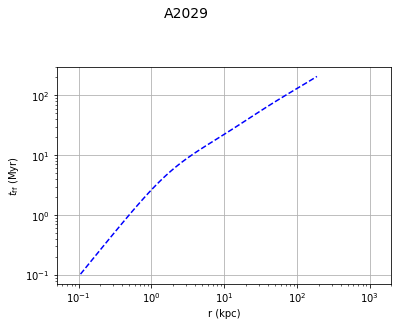

In [2]:
f = open("Desktop/A2029/tff_time_A2029","w")
for i in range(0,len(r)):
    f.write("%f %.7e\n"%( r[i], tff[i]))
plt.loglog(r,tff/3.15e13,'b--')
#plt.ylim(300,2000)
plt.xlim(0.05,2000)
plt.xlabel(r'r (kpc)')
plt.ylabel(r'$t_{\rm ff}$ (Myr)')
plt.text(1.5,2000, 'A2029', dict(size=14))
plt.grid()
plt.savefig('Desktop/tff_A2029.png', dpi=400)
plt.show()
f.close()

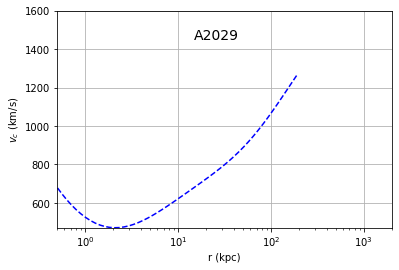

In [3]:
plt.semilogx(r,vc/1.e5,'b--')
plt.ylim(470,1600)
plt.xlim(0.5,2000)
plt.xlabel('r (kpc)')
plt.ylabel(r'$v_c$ (km/s)')
plt.text(15,1450, 'A2029', dict(size=14))
plt.grid()
plt.savefig('Desktop/circ_vel_A2029.png', dpi=400)
plt.show()
#plt.save('Desktop/initialisation/circular_vel_Tot.png')

In [24]:
2*3.14159265*0.4*1.67e-23*((20*3.086e21)**3)/2.e33/1.e12

4.934056142670923

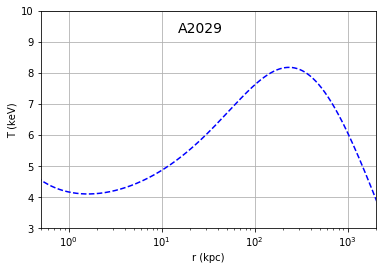

In [17]:
plt.semilogx(r,TkeV,'b--')#, r, NTinK/1.16e7,'r-')
plt.ylim(3,10)
plt.xlim(0.5,2000)
plt.xlabel('r (kpc)')
plt.ylabel(r'T (keV)')
plt.text(15,9.3, 'A2029', dict(size=14))
plt.grid()
plt.savefig('Desktop/temp_A2029.png', dpi=400)
plt.show()

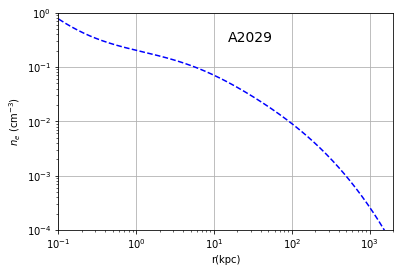

In [18]:
plt.loglog(r,geltn,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('$n_e$ (cm$^{-3}$)')
plt.text(15,0.3, 'A2029', dict(size=14))
plt.xlim(0.1,2000)
plt.ylim(1.0e-4,1.0)
plt.grid()
plt.savefig('Desktop/elec_den_A2029.png', dpi=400)
plt.show()

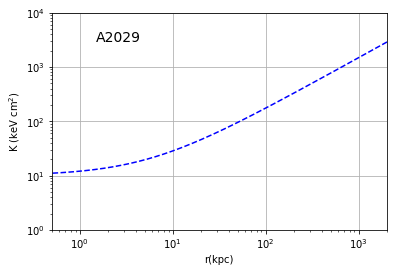

In [19]:
plt.loglog(r,K,'b--')
plt.xlabel('r(kpc)')
plt.ylabel('K (keV cm$^{2}$)')
plt.text(1.5,3000, 'A2029', dict(size=14))
plt.xlim(0.5,2000)
plt.ylim(1.0,10000.0)
plt.grid()
plt.savefig('Desktop/entropy_A2029.png', dpi=400)
plt.show()

In [76]:
f = open("Desktop/radial_prof_A2029_setup", "w")
for i in range(0,len(r)):
    #f.write("%.7e %.7e %.7e\n"%(radius[i], ent[i], tcl[i]))
    f.write("%.7e %.7e %.7e\n"%(r[i], K[i], TkeV[i]))
f.close()

In [102]:
len(r)

2048

In [189]:
math.log(10)

2.302585092994046

In [214]:
f = open("Desktop/Mass_phoenix_setup", "w")
for i in range(0,len(r)):
    #f.write("%.7e %.7e %.7e\n"%(radius[i], ent[i], tcl[i]))
    f.write("%.7e %.7e\n"%(r[i], M[i]))
f.close()

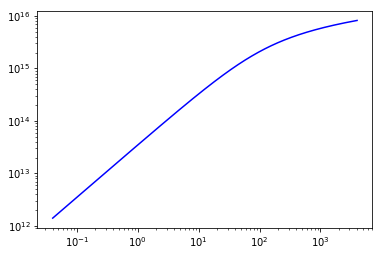

In [225]:
plt.loglog(r,(M)/2.e33,'b-');

In [17]:
teddy = np.zeros(Nmax)
for i in range(0,Nmax):
    teddy[i] = 2.0*3.14159*3.086*10**21*r[i]**(0.666)*10.0**(0.33)/(300.0*10**5);

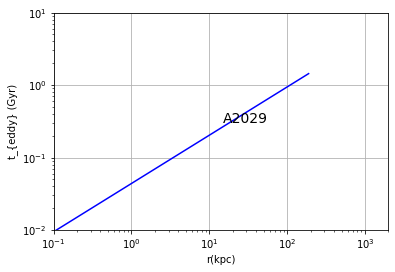

In [18]:
plt.loglog(r,teddy/3.154e16,'b-');
plt.xlabel('r(kpc)')
plt.ylabel('t_{eddy} (Gyr)')
plt.text(15,0.3, 'A2029', dict(size=14))
plt.xlim(0.1,2000)
plt.ylim(0.01,10.0)
plt.grid()
plt.show()